<a href="https://colab.research.google.com/github/orubaba/orubaba/blob/main/Trying_ANN_for_MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

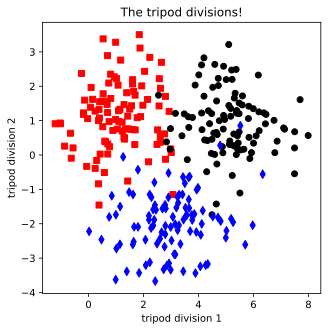

In [2]:
# create data

nPerClust = 100
blur = 1

A = [  1,  1 ]
B = [  5,  1 ]
C = [  3, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'rs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'bd')
plt.title('The tripod divisions!')
plt.xlabel('tripod division 1')
plt.ylabel('tripod division 2')
plt.show()

#ax = fig.add_subplot(111, projection='3d')

#xs = wines['residual sugar']
#ys = wines['fixed acidity']
#zs = wines['alcohol']
#ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

#ax.set_xlabel('Residual Sugar')
#ax.set_ylabel('Fixed Acidity')
#ax.set_zlabel('Alcohol')

In [3]:
# model architecture
ANNq = nn.Sequential(
    nn.Linear(2,4),    # input layer
    nn.ReLU(),         # activation unit
    nn.Linear(4,3),    # output units
    nn.Softmax(dim=1), # final activation unit (see Additional Exploration #2 for a discussion about this)
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNq.parameters(),lr=.05)

In [4]:
# test the model
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


In [5]:
# train the model
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  y_pred = ANNq(data)

  # compute loss
  loss = lossfun(y_pred,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(y_pred,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNq(data)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

Final accuracy: 95.6667%


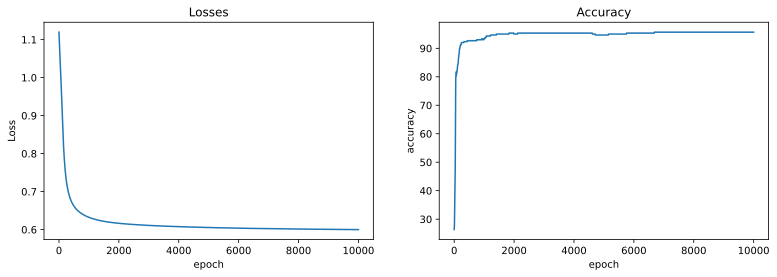

In [6]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [7]:
# confirm that all model predictions sum to 1
torch.sum(y_pred,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

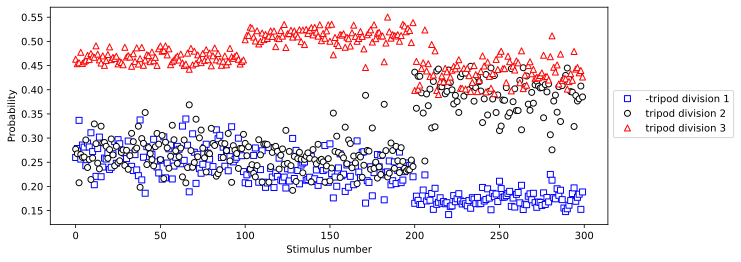

In [8]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = [  'bs','ko','r^' ]
for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['-tripod division 1','tripod division 2','tripod division 3'],loc=(1.01,.4))
plt.show()